# Customer Churn IBM Analysis


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_excel('data/raw/Telco_customer_churn.xlsx')


## Data Cleaning & Review 

In [66]:
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65        820.50   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70       5036.30   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

In [7]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

Above we can notice that only churn reason has null values, and that seems to by a significant amount. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

We can also see that the Total Charges column is of type object even though it contains numerical data. So we can have to change the data type for this section.

In [17]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [21]:
# finding the missing values
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [23]:
data_na = (df.isnull().sum() / len(df)) 
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'% Missing' :data_na * 100, "number of nulls" : df[data_na.index].isna().sum()})
missing_data

% Missing  number of nulls
Churn Reason   73.463013             5174
Total Charges   0.156183               11

Above we find out that 'Churn Reason' and 'Total Charges' have missing values. 
We will fill the missing values in 'Total Charges' with the mean of the column.

### What is the reason for why there are so many null values for Churn Reason?

In [26]:
churn_df = df[['Churn Reason', 'Churn Label']]

In [31]:
print('Churn Label is Yes:', len(churn_df[churn_df['Churn Label'] == 'Yes']))
print('Churn Label is No:',len(churn_df[churn_df['Churn Label'] == 'No']))
print('Churn Reason is missing:',len(churn_df[churn_df['Churn Reason'].isnull()]))

Churn Lable is Yes: 1869
Churn Lable is No: 5174
Churn Reason is missing: 5174


Above we can see a correlation between churn label and churn reason, when the customer did not churn, there was no reason given, and so understandably they did not have a churn reason.

### What % of customers actually churned?

Percentage of Customers that actually churned: 26.536987079369588


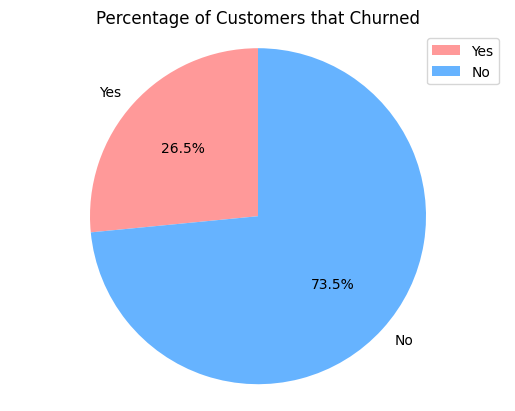

In [45]:
print('Percentage of Customers that actually churned:',(len(churn_df[churn_df['Churn Label'] == 'Yes'])/len(churn_df)) * 100)

labels = ['Yes', 'No']
sizes = [len(churn_df[churn_df['Churn Label'] == 'Yes']), len(churn_df[churn_df['Churn Label'] == 'No'])]
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')
plt.title('Percentage of Customers that Churned')
plt.legend()
plt.show()

### Why did these customers churn?

In [32]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [40]:
df[df['Churn Reason'].notna() == True]['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased'], dtype=object)

Above we can see all the potential reasons for why a customer churned


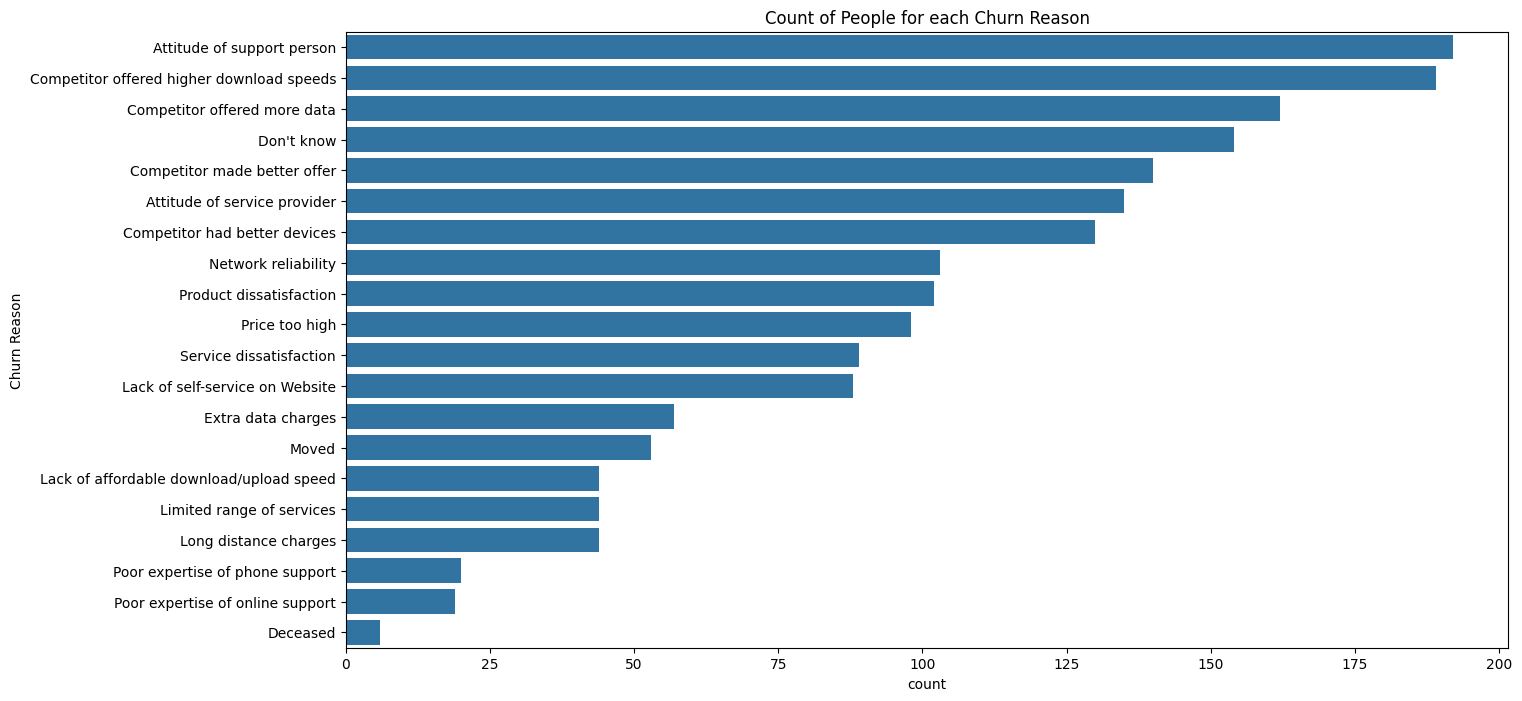

In [56]:
# make it ascending order
plt.figure(figsize=(15,8))
sns.countplot(y='Churn Reason', data=df, order = df['Churn Reason'].value_counts().index)
plt.title('Count of People for each Churn Reason')
plt.show()


There are big three reasons we can derive from why customers churned: 
- The attitude of the support person/ service provider 
- Competitor provided better services at a lower/same price point
- Dissatisfaction wirh the service provided

There are some factors provided above that can be considered to be in the companies control and others that are not. 
Some broad categories we can club reason into are:
    - Customer Service (In Control)
    - Competition (Out of control)
    - Reliability (In control)
    - Personal Reasons of Customers (Out of control)

From the categories listed above that you can club many of the reasons into, the most prevalent issues faced by IBM are in fact in their control. Thus to have a higher retention rate of customers, IBM will have to employ techniques to better serve their customers by providing better customer service and reliability of their product. 

### What kind of customers are churning?

In [67]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

#### 

In [70]:
df['Streaming TV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [69]:
df['Streaming Movies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

#### What kind of contracts do these customers have? Which kind of contract leads to more customer loyatly?

#### Where are these customers churning the most?

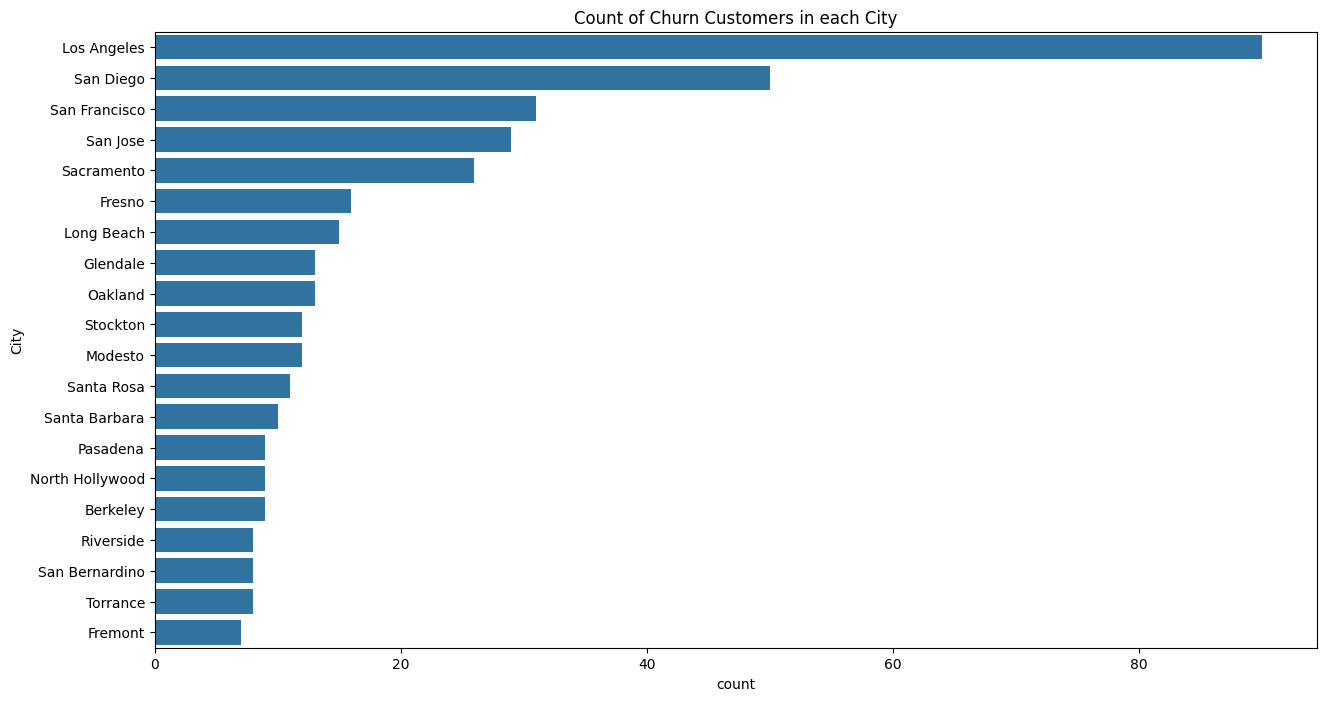

In [85]:

# where are the churn customer located, make a plot for the number of churn customers in each city top 10 cities
plt.figure(figsize=(15,8))
sns.countplot(y='City', data=df[df['Churn Label'] == 'Yes'], order = df[df['Churn Label'] == 'Yes']['City'].value_counts().index[:20])
plt.title('Count of Churn Customers in each City')
plt.show()

#### Does the seniority of the customer matter?

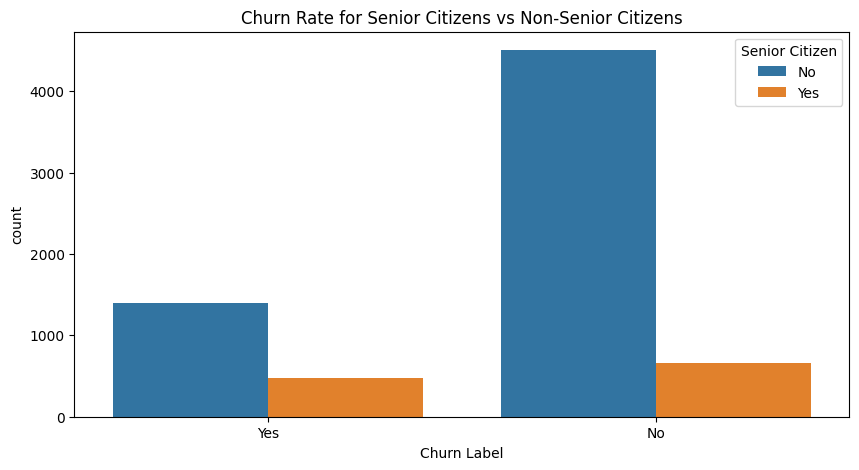

In [62]:
df[(df['Churn Label'] == 'Yes') & (df['Senior Citizen'] == 1)]

# make a plot of the churn rate for senior citizens vs non-senior citizens
senior_citizen = df[df['Senior Citizen'] == 1]
non_senior_citizen = df[df['Senior Citizen'] == 0]

# make a plot
plt.figure(figsize=(10,5))
sns.countplot(x='Churn Label', data=df, hue='Senior Citizen')
plt.title('Churn Rate for Senior Citizens vs Non-Senior Citizens')
plt.show()


As we can see there is a higher proportion of senior citizens churning than non-senior ones

#### How long have these customers been with the company?

In [78]:
df[df['Churn Label'] == 'Yes']['Tenure Months'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: Tenure Months, dtype: float64

In [79]:
df[df['Churn Label'] == 'No']['Tenure Months'].describe()

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: Tenure Months, dtype: float64

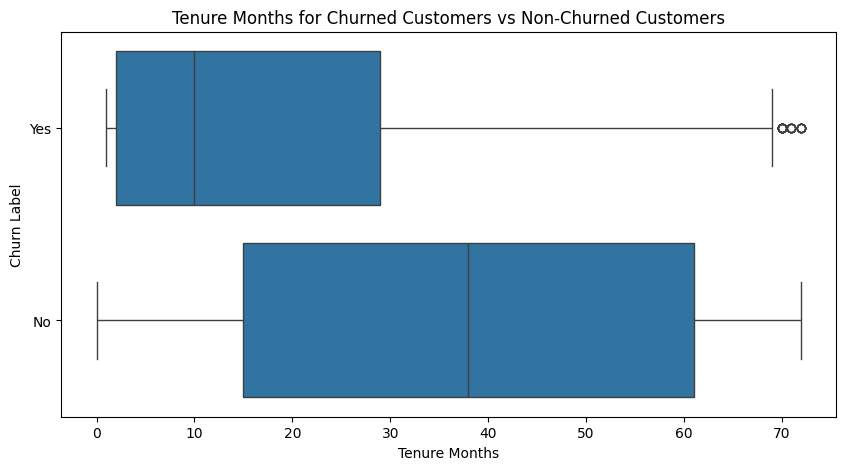

In [87]:
# make it sideways
plt.figure(figsize=(10,5))
sns.boxplot(y='Churn Label', x='Tenure Months', data=df)
plt.title('Tenure Months for Churned Customers vs Non-Churned Customers')
plt.show()


In [76]:
df[df['Churn Label'] == 'No']['Tenure Months'].mean()

np.float64(37.56996521066873)

### Where are all these customers located at?

In [65]:
# make a plot on a map for location of each unique customer based on longtiude and latitude
import folium
from folium.plugins import MarkerCluster

# create a map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

# add a marker for each customer
marker_cluster = MarkerCluster().add_to(m)

for i in range(0, len(df)):
    folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], popup=df.iloc[i]['CustomerID']).add_to(marker_cluster)

m.save('maps/customer_location.html')
m


As we can see, most of the customers are located in California, of which most of the customers live on the coast. Most customers in the south are concentrated in Los Angeles, but in the north, there is more of a spread of customers around the bay area and its neighbouring towns and cities.